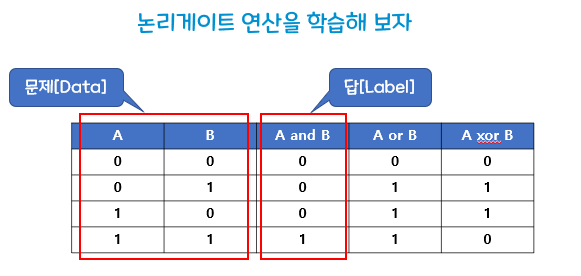

## 1. 문제 정의
- 훈련데이터와 평가 데이터 이해<br>
  (왜 우리가 평가를 해야하는지 훈련을 해야하는지 이해를 해볼 것이다)
- and, or, xor의 결과를 도출하는 머신러닝 학습 모델의 작동 방식을 이해

### 1.1 and 게이트

In [10]:
import pandas as pd

In [11]:
# 데이터 셋팅
df = pd.DataFrame({
    'A' : [0,0,1,1,1,1,0],
    'B' : [0,1,0,1,0,1,1],
    'A and B' : [0,0,0,1,0,1,0]
})

In [12]:
df

,A,B,A and B
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
4,1,0,0
5,1,1,1
6,0,1,0


In [13]:
# 데이터 분리
# 문제 데이터셋 / 정답 데이터셋으로 분리
# loc/ iloc[행, 열범위]를 사용 -> 열범위에 
x = df.iloc[ : , 0 : 2 ]
y = df.iloc[ : , 2 : ]  # 시리즈 형태임

In [45]:
print(y)

   A and B
0        0
1        0
2        0
3        1
4        0
5        1
6        0


In [15]:
print(x.shape)
print(y.shape)

(7, 2)
(7, 1)


In [46]:
# 휸련데이터/ 평가데이터 셋으로 분리
x_train =  x.iloc[0:5, : ]
y_train =  y[0:5 ] # 얘는 시리즈라서 1차원형태로 표현해줘야함
x_test = x.iloc[5 : , : ]
y_test =  y[5 : ] # 얘는 시리즈라서 1차원형태로 표현해줘야함

In [47]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5, 2)
(5, 1)
(2, 2)
(2, 1)


In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [19]:
rf.fit(x,y)

C:\Users\smhrd\AppData\Local\Temp\ipykernel_2624\2439990766.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x,y)


RandomForestRegressor()

In [20]:
rf.predict([[0,1]])

c:\Users\smhrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.09])

In [21]:
#ML 모델 학습하기(Knn모델)
# 모델 생성
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn_and = KNeighborsClassifier()
knn_and

KNeighborsClassifier()

In [23]:
# fit() : 모델에 데이터를 학습시키는 명령어, 지도학습인 경우 
# 훈련용 문제데이터/ 평가용 문제데이터가 입력
knn_and.fit(x_train,y_train)

c:\Users\smhrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [24]:
# predict(x_test) : 훈련된 모델과 새로운 문제데이터를 이용해서 값을 예측하는 명령어
pre = knn_and.predict(x_test)
pre

array([0, 0], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score # accuracy_score : 정확도

In [26]:
accuracy_score(y_test,pre)

0.5

In [27]:
df

,A,B,A and B
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
4,1,0,0
5,1,1,1
6,0,1,0


In [28]:
knn_and1 = KNeighborsClassifier(n_neighbors=1)

In [29]:
knn_and1.fit(x_train,y_train)

c:\Users\smhrd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [30]:
pre = knn_and1.predict(x_test)
pre

array([1, 0], dtype=int64)

In [31]:
accuracy_score(y_test,pre)

1.0

### xor 데이터

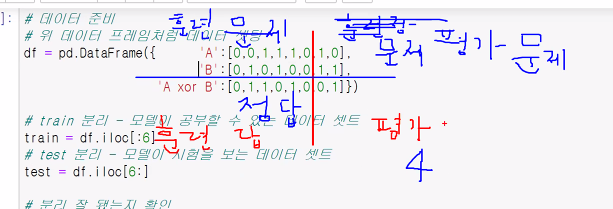

In [32]:
# 위 데이터 프레임처럼 데이터 셋팅
# train 6개 test7개로 나뉘어짐
# 거기에서 또 4등분으로 나뉘어짐
df = pd.DataFrame({ 'A':[0,0,1,1,1,0,1,0],
                    'B':[0,1,0,1,0,0,1,1],
                    'A xor B':[0,1,1,0,1,0,0,1]})
# train 분리
train = df.iloc[:6]
# test 분리
test = df.iloc[6:]

# 분리 잘 됐는지 확인 
print(train.shape)
print(train)
print(test.shape)
print(test)



(6, 3)
   A  B  A xor B
0  0  0        0
1  0  1        1
2  1  0        1
3  1  1        0
4  1  0        1
5  0  0        0
(2, 3)
   A  B  A xor B
6  1  1        0
7  0  1        1


In [33]:
# 0~5(6개) 행까지 train
# train 문제와 실제답 분리

X_train= train.iloc[:,:2]
y_train = train.iloc[:,2]
print(X_train.shape)
print(y_train.shape)


# 6~7(2개) 행 test
# test 문제와 실제답으로 분리
X_test = test.iloc[:,:2]
y_test = test.iloc[:,2]
print(X_test.shape)
print(y_test.shape)

(6, 2)
(6,)
(2, 2)
(2,)


In [34]:
# 모델링
# 훈련을 시키기 위해서 모델을 데려옴(사이킷런에 있는 knn 모델 데리고 옴)
# knn은 뒤에서 더 배운다고!
from sklearn.neighbors import KNeighborsClassifier

In [35]:
# n_neighbors : 주변의 이웃을 살펴보자 근데 몇개 살펴보고 새로운 데이터를 판단하는 구조
knn_xor = KNeighborsClassifier(n_neighbors=1)

In [36]:
knn_xor.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
#위의 규칙을 예측한는것이다.
pre = knn_xor.predict(X_test)
pre

array([0, 1], dtype=int64)

In [38]:
# 분류모델의 하나의 평가지표 -> 정확도를 가지고 이 모델의 성능을 평가하는 평가 지표임!
accuracy_score(pre,y_test)

1.0

In [39]:
#1번째 : score함수
knn_xor.score(X_test,y_test)

1.0

In [40]:
# 2번째 : 잘못된 데이터나 모델을 이용해서 평가를 한다면?
knn_and.score(X_test,y_test) # 현재 학습된 모델은 and게이트, 데이터는 xor게이트


0.5

### 성규가 푼 bmi

In [41]:
data = pd.read_csv("bmi_500.csv", sep=",")
data.head

train = data.iloc[:400]
test = data.iloc[400:]

X_train= train.iloc[:, 1: 3]
y_train = train.iloc[ : ,  3: ]
X_test = test.iloc[:,1 : 3]
y_test = test.iloc[ : , 3: ]

knn_bmi = KNeighborsClassifier()
knn_bmi.fit(X_train, y_train)

pre = knn_bmi.predict(X_test)

accuracy_score(pre, y_test)

knn_bmi.score(X_test, y_test)

FileNotFoundError: [Errno 2] No such file or directory: 'bmi_500.csv'